In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import os
import sys
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
sys.path.append(os.path.abspath(r'C:\Users\diver\Desktop\GitHub\Repositories\YGO-Card-Database'))
import cards_scraping
import data_cleaning


In [17]:
data_raw = cards_scraping.get_staples(cards_scraping.make_it_dataframe())
data, image_links = data_cleaning.wholesome_cleaning(data_raw)

C:\Users\diver\Desktop\GitHub\Repositories\YGO-Card-Database\data_cleaning.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('null', np.nan, inplace = True)


In [18]:
data

,id,name,type,desc,race,card_price,up_votes,down_votes,views,atk,def,level,attribute,archetype,linkval,scale,tcg_date,frameType,staple,is_pendulum
0,34541863,"""A"" Cell Breeding Device",Spell Card,"During each of your Standby Phases, put 1 A-Co...",Continuous,0.10,118,110,312507,-1.0,-1.0,-1.0,None,Alien,0.0,-1.0,2007-05-16,spell,0.0,0
1,64163367,"""A"" Cell Incubator",Spell Card,Each time an A-Counter(s) is removed from play...,Continuous,0.12,25,20,220070,-1.0,-1.0,-1.0,None,Alien,0.0,-1.0,2007-11-14,spell,0.0,0
2,91231901,"""A"" Cell Recombination Device",Spell Card,Target 1 face-up monster on the field; send 1 ...,Quick-Play,0.16,19,15,228407,-1.0,-1.0,-1.0,None,Alien,0.0,-1.0,2016-11-03,spell,0.0,0
3,73262676,"""A"" Cell Scatter Burst",Spell Card,"Select 1 face-up ""Alien"" monster you control. ...",Quick-Play,0.15,12,4,175769,-1.0,-1.0,-1.0,None,Alien,0.0,-1.0,2007-02-28,spell,0.0,0
4,98319530,"""Infernoble Arms - Almace""",Spell Card,While this card is equipped to a monster: You ...,Equip,0.59,0,0,68054,-1.0,-1.0,-1.0,None,Infernoble Arms,0.0,-1.0,2023-07-27,spell,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13561,2648201,ZW - Sleipnir Mail,Effect Monster,"You can target 1 ""Utopia"" monster you control;...",Beast,0.06,6,0,44205,1000.0,1000.0,4.0,LIGHT,Utopia,0.0,-1.0,2014-05-16,effect,0.0,0
13562,95886782,ZW - Sylphid Wing,Effect Monster,"You can only control 1 ""ZW - Sylphid Wing"". Yo...",Beast,0.05,3,0,13124,800.0,1600.0,4.0,LIGHT,Zexal,0.0,-1.0,2021-12-02,effect,0.0,0
13563,81471108,ZW - Tornado Bringer,Effect Monster,"You can target 1 ""Utopia"" monster you control;...",Dragon,0.06,6,1,120071,1300.0,1800.0,5.0,WIND,Utopia,0.0,-1.0,2013-01-25,effect,0.0,0
13564,18865703,ZW - Ultimate Shield,Effect Monster,When this card is Normal or Special Summoned: ...,Aqua,0.04,4,11,42545,0.0,2000.0,4.0,EARTH,Utopia,0.0,-1.0,2013-01-25,effect,0.0,0


In [19]:
label_encoder = LabelEncoder()

data['frameType_encoded'] = label_encoder.fit_transform(data['frameType'])

In [20]:
list(label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8]))

['effect',
 'fusion',
 'link',
 'normal',
 'ritual',
 'spell',
 'synchro',
 'trap',
 'xyz']

In [21]:
targets = data['frameType_encoded']



vect = TfidfVectorizer(stop_words='english', max_features=1000)

wordsCountArray = vect.fit_transform(data['desc'])

X_train, X_test, y_train, y_test = train_test_split(wordsCountArray, targets, test_size=0.2, random_state=33)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 500)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [23]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1160
           1       0.88      0.31      0.46       113
           2       0.68      0.43      0.52        54
           3       0.85      0.87      0.86       102
           4       0.80      0.60      0.69        20
           5       0.61      0.60      0.60       519
           6       0.93      0.91      0.92        96
           7       0.56      0.35      0.43       389
           8       0.90      0.93      0.92       121

    accuracy                           0.72      2574
   macro avg       0.77      0.66      0.69      2574
weighted avg       0.71      0.72      0.70      2574



In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.96      0.81      1160
           1       0.93      0.24      0.38       113
           2       0.91      0.37      0.53        54
           3       0.84      0.87      0.86       102
           4       1.00      0.45      0.62        20
           5       0.67      0.55      0.61       519
           6       0.98      0.95      0.96        96
           7       0.69      0.27      0.39       389
           8       0.97      0.98      0.97       121

    accuracy                           0.72      2574
   macro avg       0.85      0.63      0.68      2574
weighted avg       0.73      0.72      0.69      2574



In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
real_labels = {0: 'effect',
        1: 'fusion',
        2: 'link',
        3: 'normal',
        4: 'ritual',
        5: 'spell',
        6: 'synchro',
        7: 'trap',
        8: 'xyz'}

In [28]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1160
           1       0.88      0.50      0.64       113
           2       0.85      0.72      0.78        54
           3       0.79      0.89      0.84       102
           4       0.78      0.90      0.84        20
           5       0.65      0.62      0.64       519
           6       0.96      0.97      0.96        96
           7       0.63      0.39      0.48       389
           8       1.00      0.98      0.99       121

    accuracy                           0.76      2574
   macro avg       0.81      0.77      0.78      2574
weighted avg       0.75      0.76      0.75      2574

0.7599067599067599


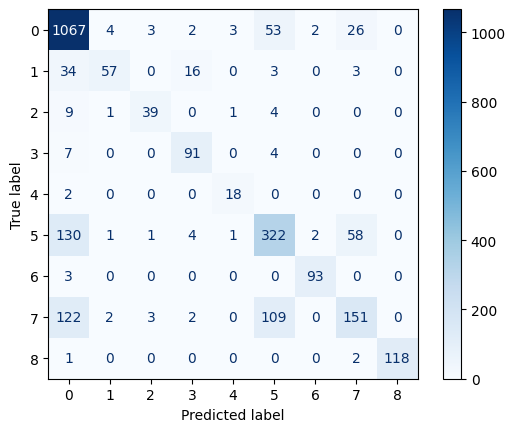

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Anzeige der Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Farbkarte anpassen
plt.show()

In [30]:
#import optuna
#from sklearn.metrics import accuracy_score
#
#def objective(trial):
#    param = {
#    'objective': 'binary:logistic',  # Oder 'multi:softmax' für mehr Klassen
#    'max_depth': trial.suggest_int('max_depth', 3, 10),  # max_depthzwischen 3 und 10
#    'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5,1e-1),  # vielleicht bisschen groeber #suchen, Log-skalierte Lernrate
#    'n_estimators': trial.suggest_int('n_estimators', 50, 500),  # Anzahlder Bäume
#    'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # Anteil derTrainingsdaten pro Baum
#    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0), # Anteil der Features pro Baum
#    'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  #Mindestanzahl an Instanzen pro Blatt
#    'gamma': trial.suggest_float('gamma', 0.0, 1.0),  # Mindestverbesserungfür einen Split
#    'alpha': trial.suggest_float('alpha', 0.0, 1.0),  # L1-Regularisierung
#    'lambda': trial.suggest_float('lambda', 0.0, 1.0),  # L2-Regularisierung
#    }
#
#    model = XGBClassifier(**param)
#    model.fit(X_train, y_train)
#
#    accuracy = accuracy_score(y_test, y_pred)
#
#    return accuracy
#
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)
#
#print("Beste Parameter:", study.best_params)
#print("Beste Genauigkeit:", study.best_value)

In [31]:
# stemming, lemmatisierung

In [32]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.97      0.69      1160
           1       0.56      0.04      0.08       113
           2       0.71      0.09      0.16        54
           3       0.97      0.64      0.77       102
           4       0.00      0.00      0.00        20
           5       0.58      0.24      0.34       519
           6       0.80      0.08      0.15        96
           7       0.64      0.11      0.19       389
           8       0.67      0.35      0.46       121

    accuracy                           0.55      2574
   macro avg       0.61      0.28      0.32      2574
weighted avg       0.59      0.55      0.47      2574



c:\Users\diver\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diver\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diver\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo